In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
data = pd.read_csv('../input/hr-employee-attrition/HR Employee Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

## Preparing the Data

In [4]:
data['Education'] = data['Education'].map({1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'})

data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})

data['JobInvolvement'] = data['JobInvolvement'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})

data['JobSatisfaction'] = data['JobSatisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})

data['PerformanceRating'] = data['PerformanceRating'].map({1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'})

data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})

data['WorkLifeBalance'] = data['WorkLifeBalance'].map({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})

data['StockOptionLevel'] = data['StockOptionLevel'].map({0:'Level 1', 1:'Level 2', 2:'Level 3', 3:'Level4'})

In [5]:
education_type = CategoricalDtype(categories=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], ordered=True)
data['Education'] = data['Education'].astype(education_type)

rank_type = CategoricalDtype(categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].astype(rank_type)
data['JobInvolvement'] = data['JobInvolvement'].astype(rank_type)
data['JobSatisfaction'] = data['JobSatisfaction'].astype(rank_type)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].astype(rank_type)

performance_type = CategoricalDtype(categories=['Low', 'Good', 'Excellent', 'Outstanding'])
data['PerformanceRating'] = data['PerformanceRating'].astype(performance_type)

wlb_type = CategoricalDtype(categories=['Bad', 'Good', 'Better', 'Best'], ordered=True)
data['WorkLifeBalance'] = data['WorkLifeBalance'].astype(wlb_type)

stock_type = CategoricalDtype(categories=['Level 1', 'Level 2', 'Level 3', 'Level4'], ordered=True)
data['StockOptionLevel'] = data['StockOptionLevel'].astype(stock_type)

## Setting a Color Palette

In [6]:
pal = ['#E7666B', '#ECB56A', '#E9EAE5', '#ABC7C4', '#0E899B', '#885A5A', '#353A47', '#BEB7A4' , '#47682C']
my_pal = sns.color_palette(pal)
my_pal

[(0.9058823529411765, 0.4, 0.4196078431372549),
 (0.9254901960784314, 0.7098039215686275, 0.41568627450980394),
 (0.9137254901960784, 0.9176470588235294, 0.8980392156862745),
 (0.6705882352941176, 0.7803921568627451, 0.7686274509803922),
 (0.054901960784313725, 0.5372549019607843, 0.6078431372549019),
 (0.5333333333333333, 0.35294117647058826, 0.35294117647058826),
 (0.20784313725490197, 0.22745098039215686, 0.2784313725490196),
 (0.7450980392156863, 0.7176470588235294, 0.6431372549019608),
 (0.2784313725490196, 0.40784313725490196, 0.17254901960784313)]

In [7]:
sns.set_palette(my_pal)

In [8]:
class_pal = {"Yes": my_pal[0], "No": my_pal[-1]}

## Quick Overview of the Data

In [9]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

There are 34 features in the dataset, including both numerical and categorical features. The target variable is Attrition.

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data.describe(include=['object', 'category'])

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,9,4,3,1,2,2,4,4,4
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,Y,No,Excellent,High,Level 1,Better
freq,1233,1043,961,572,606,453,882,868,326,459,673,1470,1054,1244,459,631,893


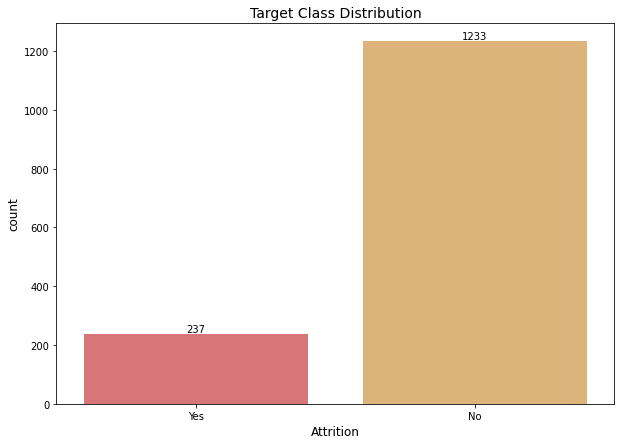

In [12]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=data, x='Attrition')
ax.bar_label(ax.containers[0])
ax.set_title('Target Class Distribution', size=14)
ax.set_xlabel('Attrition', size=12)
ax.set_ylabel('count', size=12)
plt.show()

* This is a highly imbalanced classification problem with the positive class (Attrition = Yes) making up around 16% of the data only.

## Data Distribution

### Numerical Features

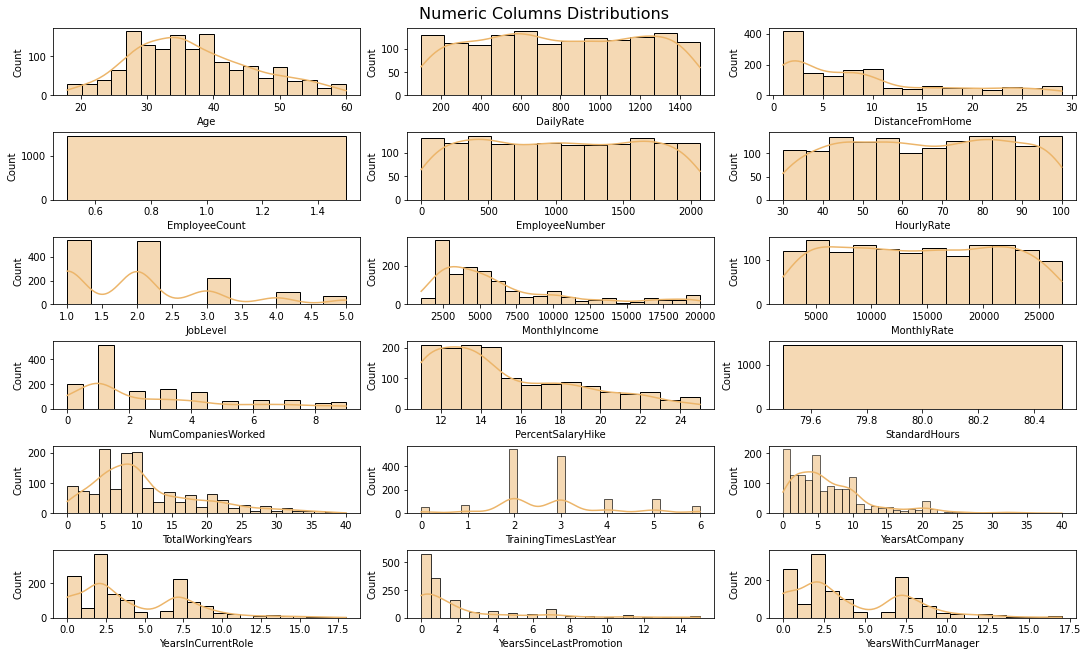

In [13]:
col_wrap = 3
cols = data.select_dtypes(include=np.number).columns

ncol = col_wrap
nrow = int(np.ceil(len(cols) / col_wrap))


fig = plt.figure(figsize=(15,9), layout='constrained')
fig.suptitle('Numeric Columns Distributions', fontsize=16)

for i , col in enumerate(cols, 1):
    plt.subplot(nrow, ncol, i)
    sns.histplot(x=data[col], kde=True, color=my_pal[1])

### Categorical Features

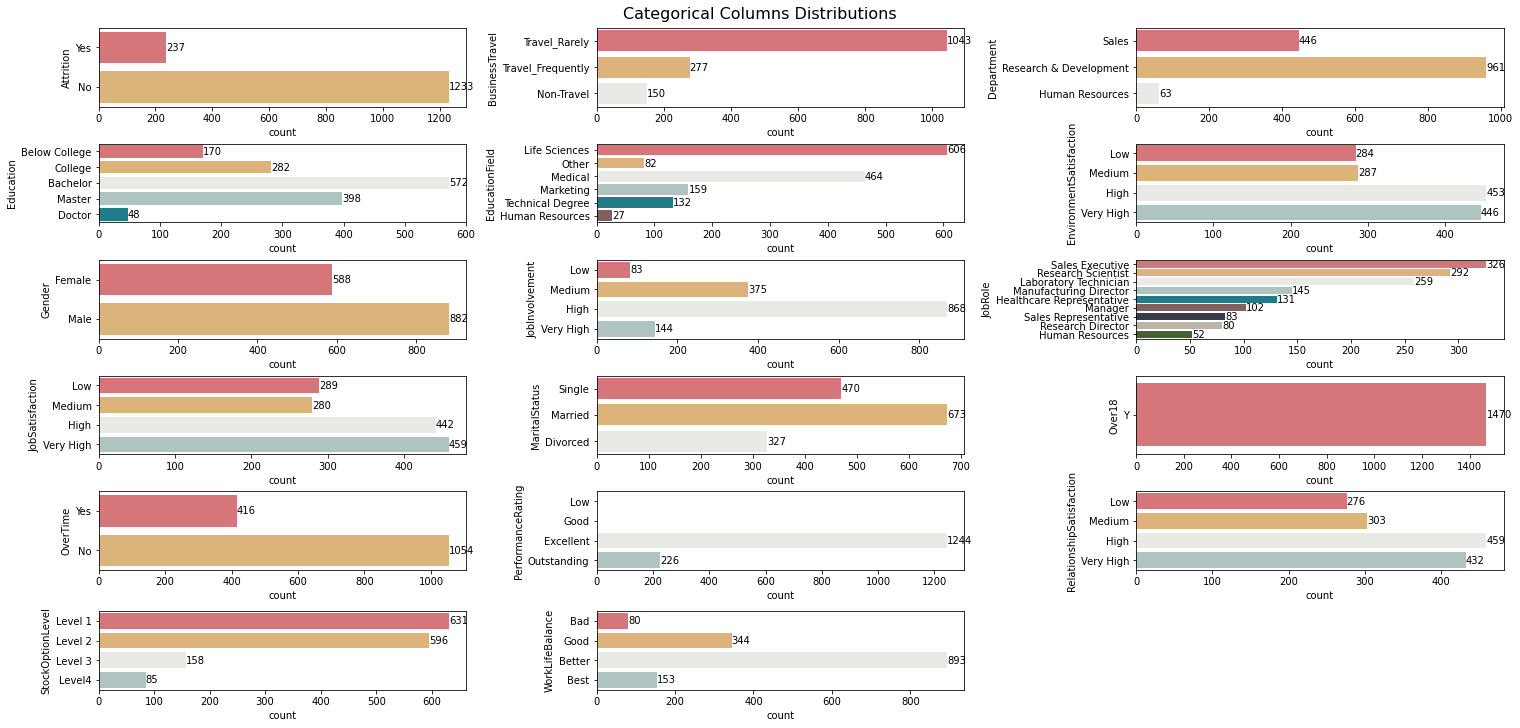

In [14]:
col_wrap = 3
cols = data.select_dtypes(include=['object', 'category']).columns

ncol = col_wrap
nrow = int(np.ceil(len(cols) / col_wrap))


fig = plt.figure(figsize=(21,10), layout='constrained')
fig.suptitle('Categorical Columns Distributions', fontsize=16)

for i , col in enumerate(cols, 1):
    ax = plt.subplot(nrow, ncol, i)
    sns.countplot(y=data[col], ax=ax)
    ax.bar_label(ax.containers[0])

# Data Visualization Functions

In [15]:
def plot_numeric_plots(data, x, target):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    sns.boxplot(data=data, x=x, y=target, ax=axs[0], palette=class_pal)
    sns.histplot(data=data, x=x, hue='Attrition', kde=True, ax=axs[1], palette=class_pal)
    plt.tight_layout()
    plt.show()

In [16]:
def plot_cat_plots(data, x, target, x_offset=0.3, y_offset=0.6):
    fig, axs = plt.subplots(1, 2, figsize=(20,5))

    sns.countplot(y=data[x], hue=data[target], ax=axs[0], palette=class_pal)
    for containter in axs[0].containers:
        axs[0].bar_label(containter)
    axs[0].yaxis.label.set_fontsize(14)
    axs[0].xaxis.label.set_fontsize(14)

    cross_tab_prop = pd.crosstab(index=data[x],
                            columns=data[target],
                            normalize='index')

    cross_tab_prop.plot(kind='barh', stacked=True, ax=axs[1],  color=class_pal)
    if data[x].dtype == 'category':
        plt.gca().invert_yaxis()

    axs[1].xaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(reversed(handles), reversed(labels), title='Attrition')
    sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1, 1))
    axs[1].yaxis.label.set_visible(False)
    axs[1].set_xlabel('percentage', size=12)

    for p in axs[1].patches:
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + x_offset * width
        y = p.get_y() + y_offset * height

        axs[1].annotate(text=f"{width*100:.1f}%",
                   xy=(x,y),
                   color = 'white',
                   weight='bold'
                   )
    
    plt.tight_layout()
    plt.show()

## Demographic Data and Attrition

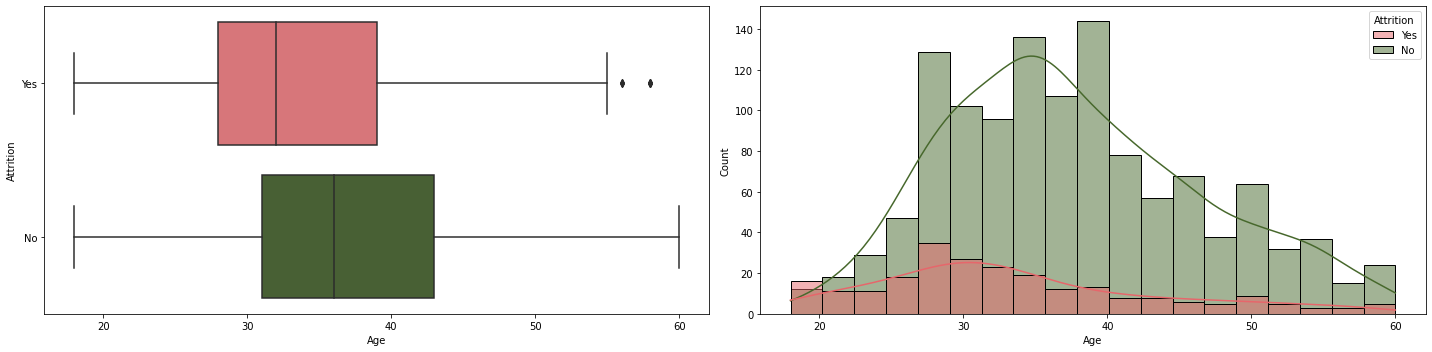

In [17]:
plot_numeric_plots(data=data, x='Age', target='Attrition')

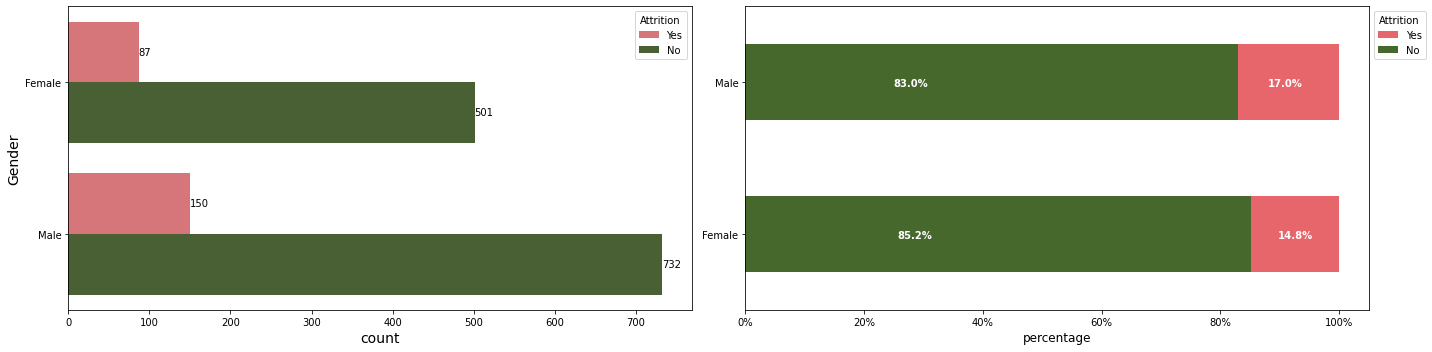

In [19]:
plot_cat_plots(data=data, x='Gender', target='Attrition', y_offset=0.45)

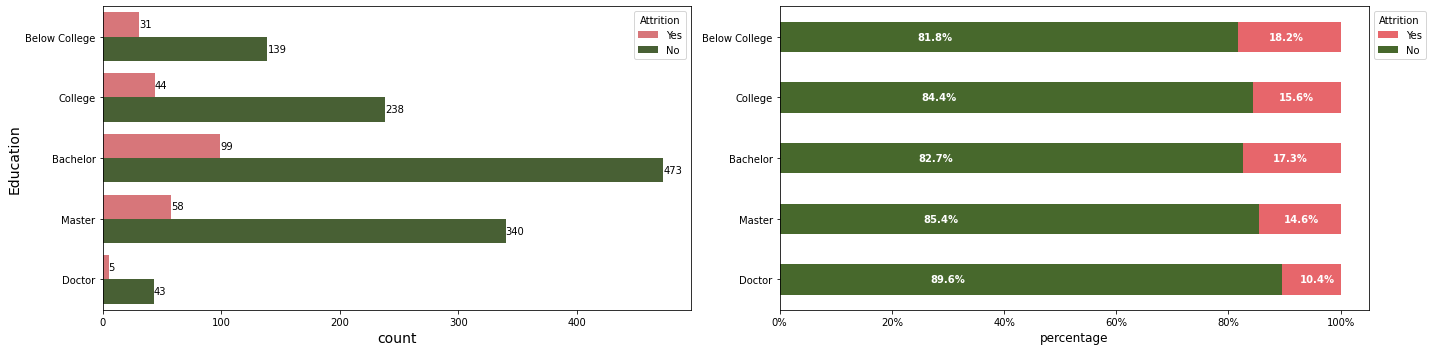

In [106]:
plot_cat_plots(data=data, x='Education', target='Attrition')

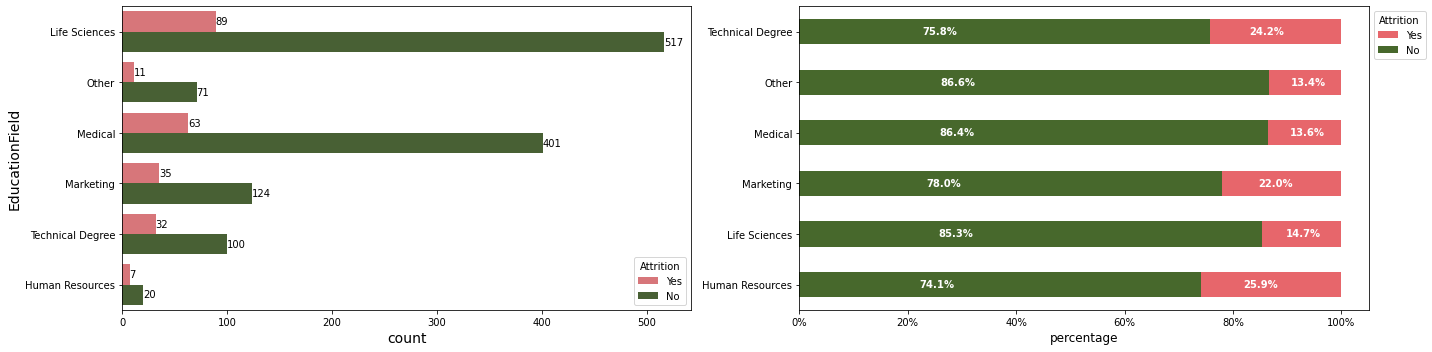

In [107]:
plot_cat_plots(data=data, x='EducationField', target='Attrition', y_offset=0.4)

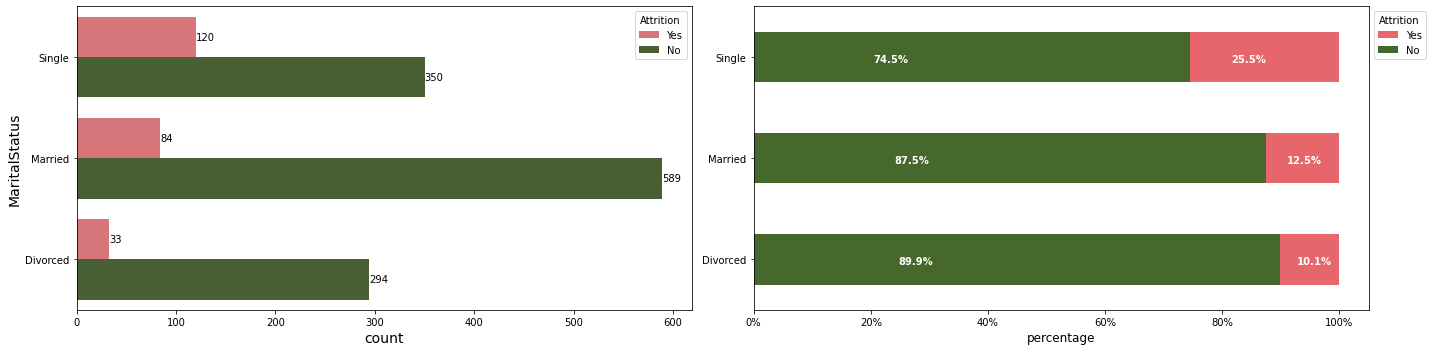

In [108]:
plot_cat_plots(data=data, x='MaritalStatus', target='Attrition', x_offset=0.275, y_offset=0.4)

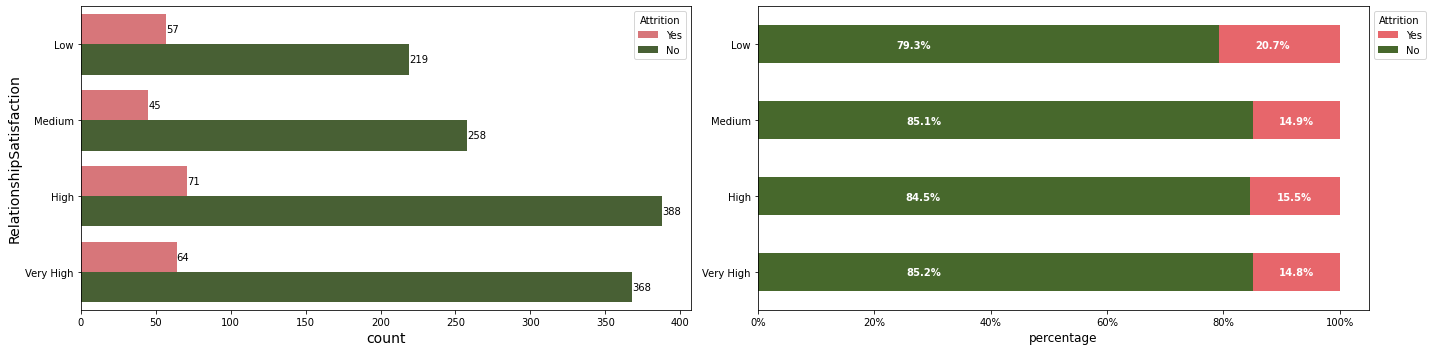

In [109]:
plot_cat_plots(data=data, x='RelationshipSatisfaction', target='Attrition')

### Summary

* The median age of employees that left the company is less than the median age of employees that stayed in the company.
* Male employees have a higher rate of attrition (17%) than female employees (14.8%).
* Employees with higher education levels tend to have lower attrition rates.
* Employees with technical, marketing and human resources degrees have the highest attrition rates (higher than 20%).
* Single employees have a considerably higher attrition rate (25.5%) than other employees.
* Employees that reported low relationship satisfaction have the highest attrition rate (20.7%).

## Compensation and Attrition

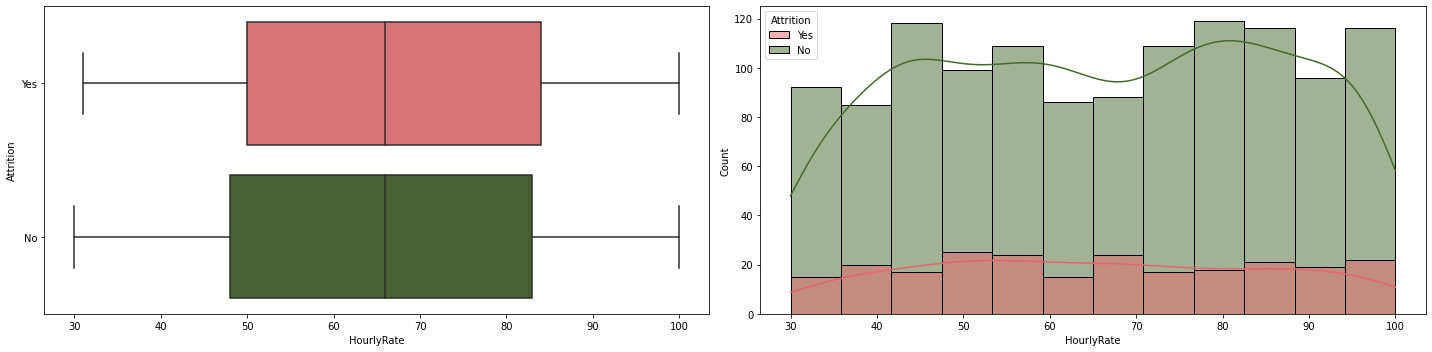

In [110]:
plot_numeric_plots(data=data, x='HourlyRate', target='Attrition')

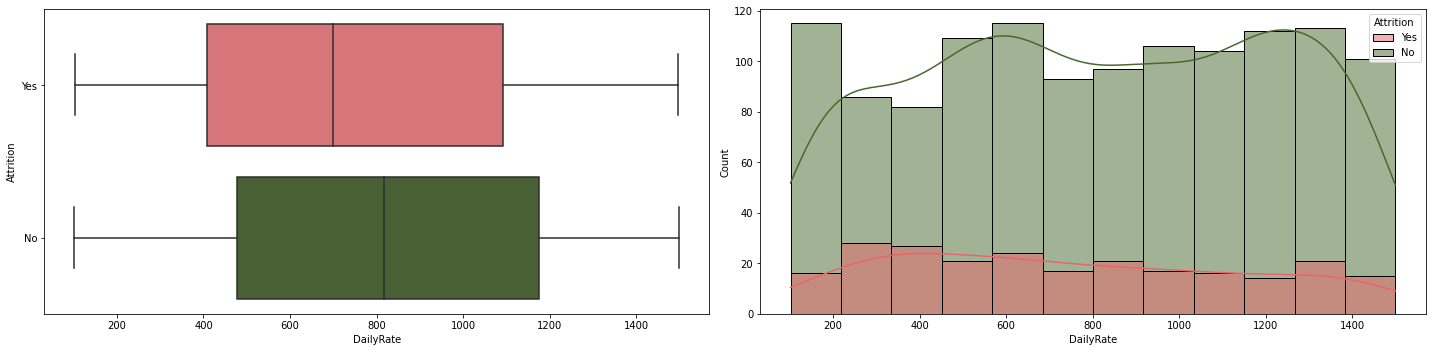

In [111]:
plot_numeric_plots(data=data, x='DailyRate', target='Attrition')

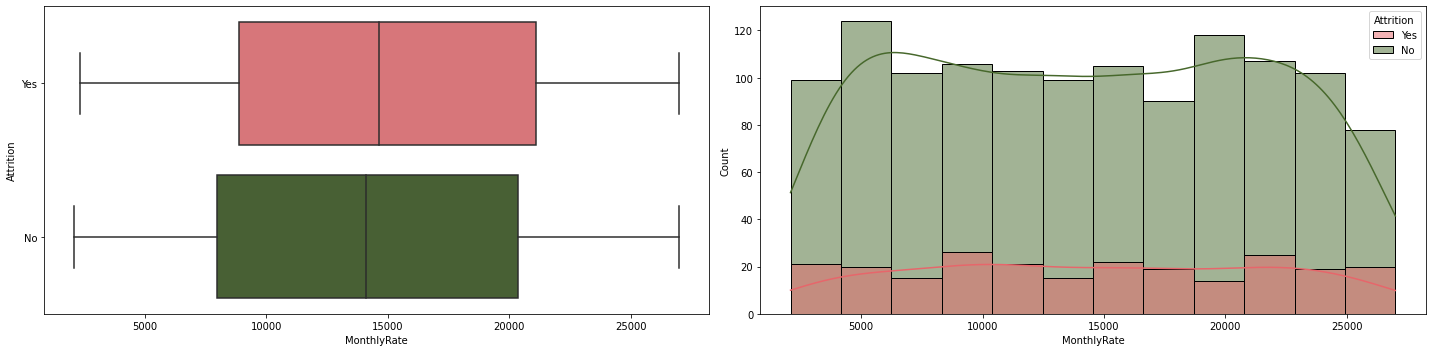

In [112]:
plot_numeric_plots(data=data, x='MonthlyRate', target='Attrition')

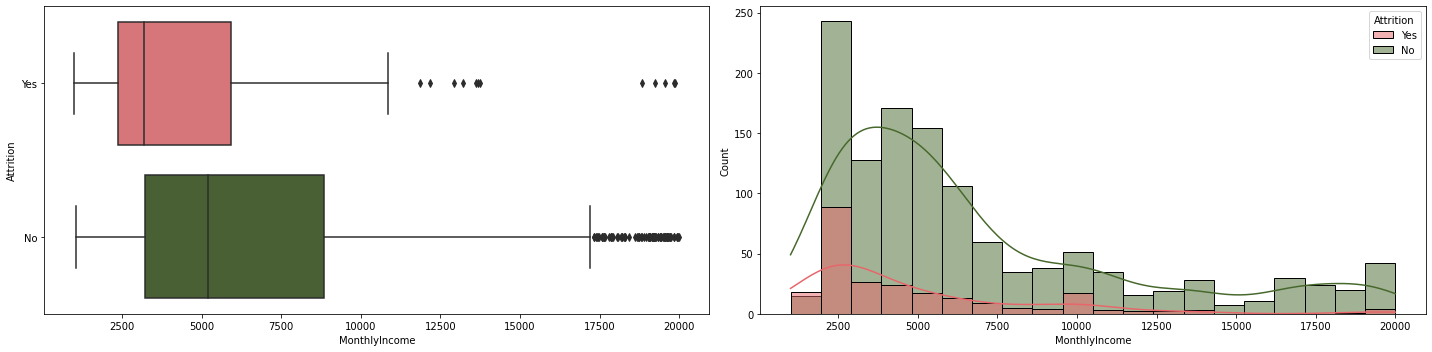

In [113]:
plot_numeric_plots(data=data, x='MonthlyIncome', target='Attrition')

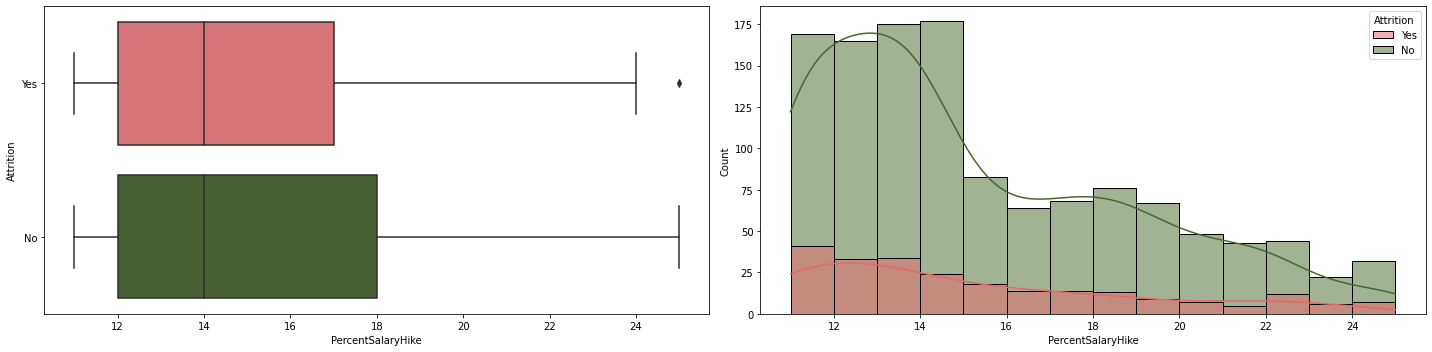

In [114]:
plot_numeric_plots(data=data, x='PercentSalaryHike', target='Attrition')

### Summary

* The median daily rate and monhtly income of employees who left the company is lower than that of employees that stayed in the company. 

## Work Life Balance and Attrition

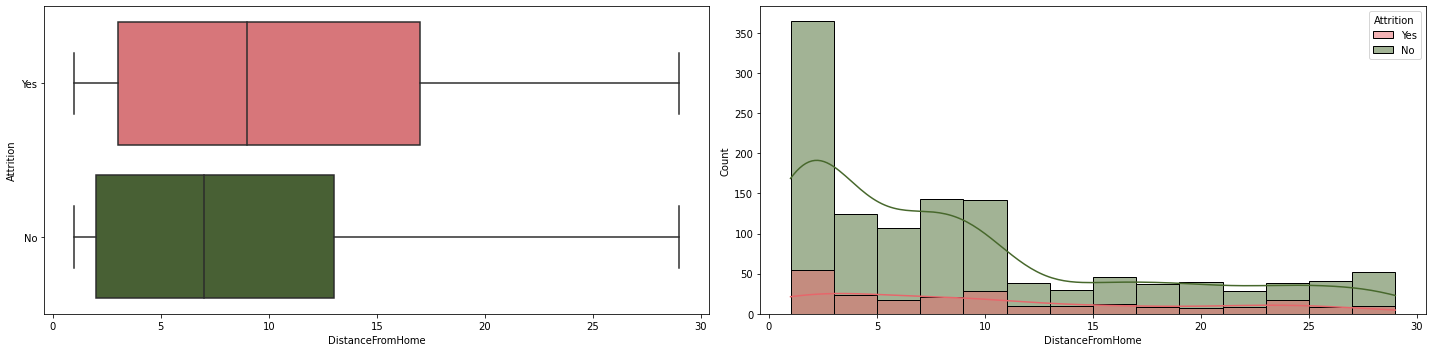

In [115]:
plot_numeric_plots(data=data, x='DistanceFromHome', target='Attrition')

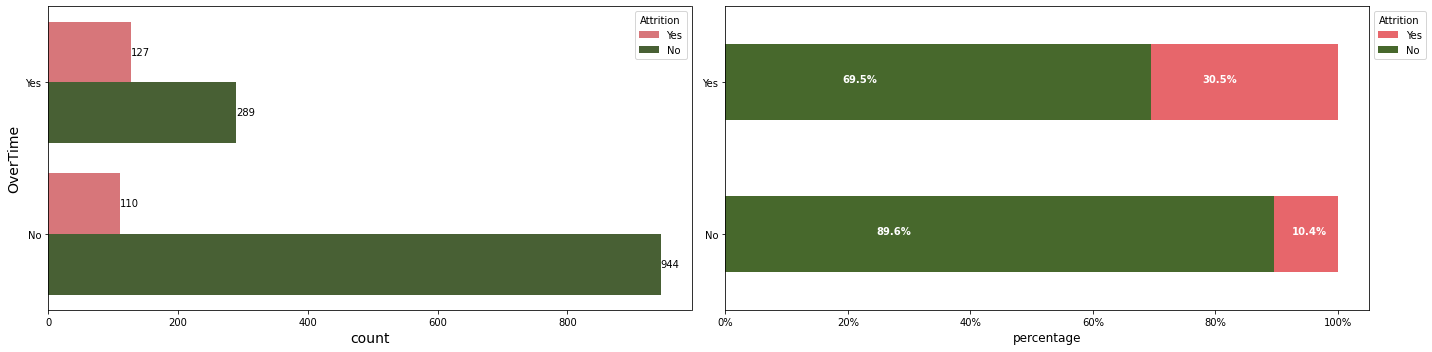

In [116]:
plot_cat_plots(data=data, x='OverTime', target='Attrition', x_offset=0.275, y_offset=0.5)

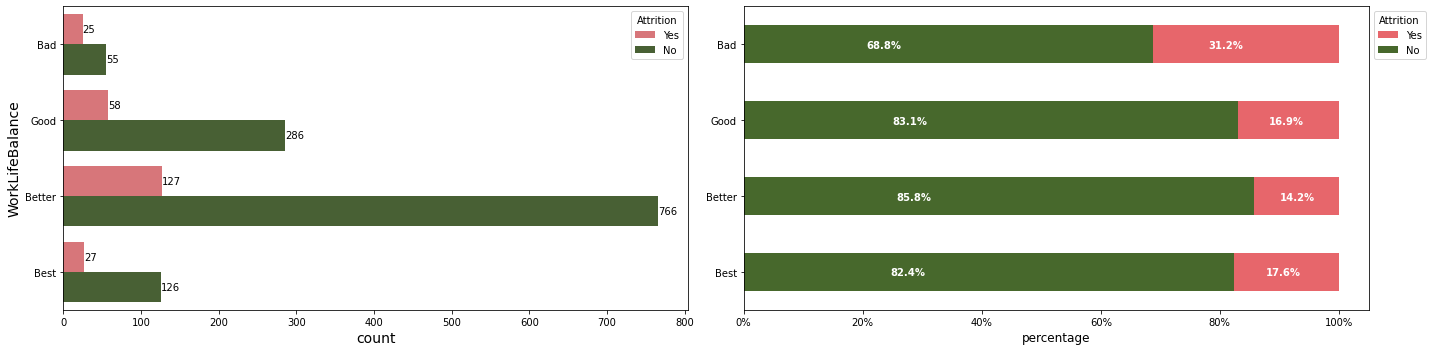

In [117]:
plot_cat_plots(data=data, x='WorkLifeBalance', target='Attrition')

### Summary

* Employees who left the company had a higher median distance from home than other employees.
* Employees who worked over-time had a significantly higher rate of attrition (30.5%) than employees who did not work overtime (10.4%).
* Employees with worse work-life-balance conditions tend to have higher rates of attrition.

## Company Satisfaction Indices and Attrition

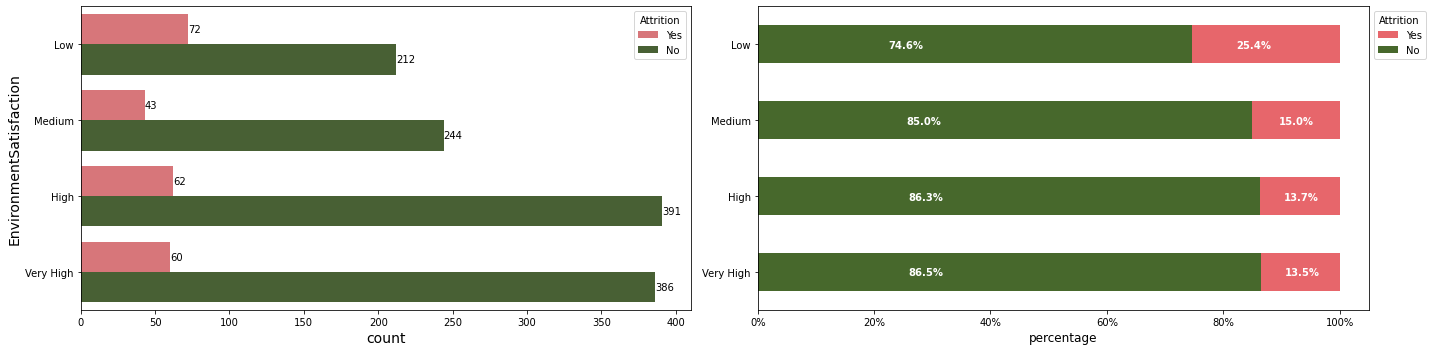

In [118]:
plot_cat_plots(data=data, x='EnvironmentSatisfaction', target='Attrition')

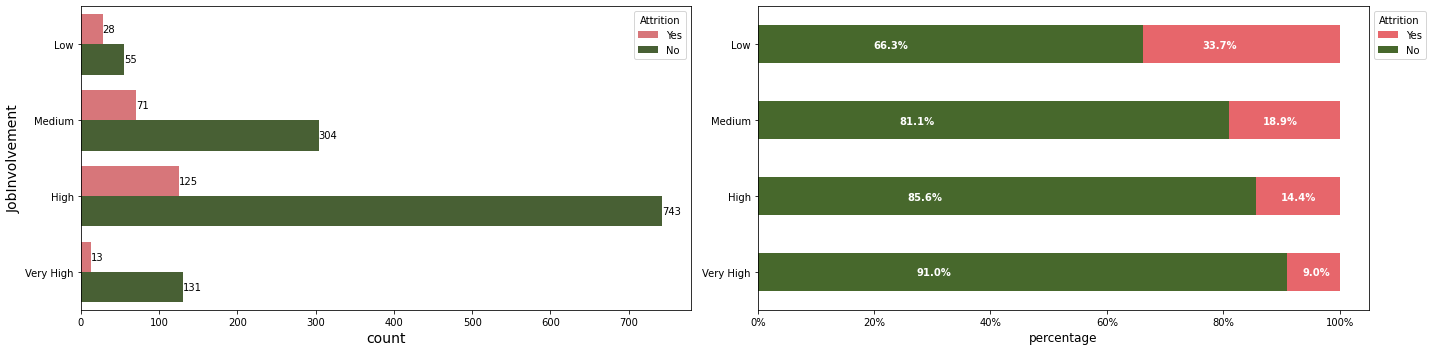

In [119]:
plot_cat_plots(data=data, x='JobInvolvement', target='Attrition')

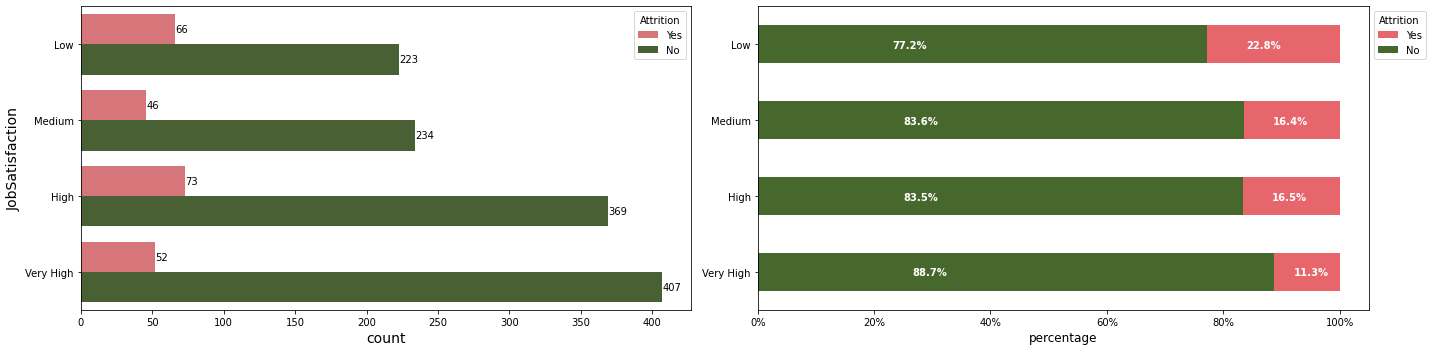

In [120]:
plot_cat_plots(data=data, x='JobSatisfaction', target='Attrition')

### Summary

* Employees with lower environment satisfaction, job involvment or overall job satisfaction have higher rates of attrition.
* Employees that reported low job involvment, low environemnt or low job satisfaction have considerably higher rates of attrition (over 20%).

## Job Perks and Attrition

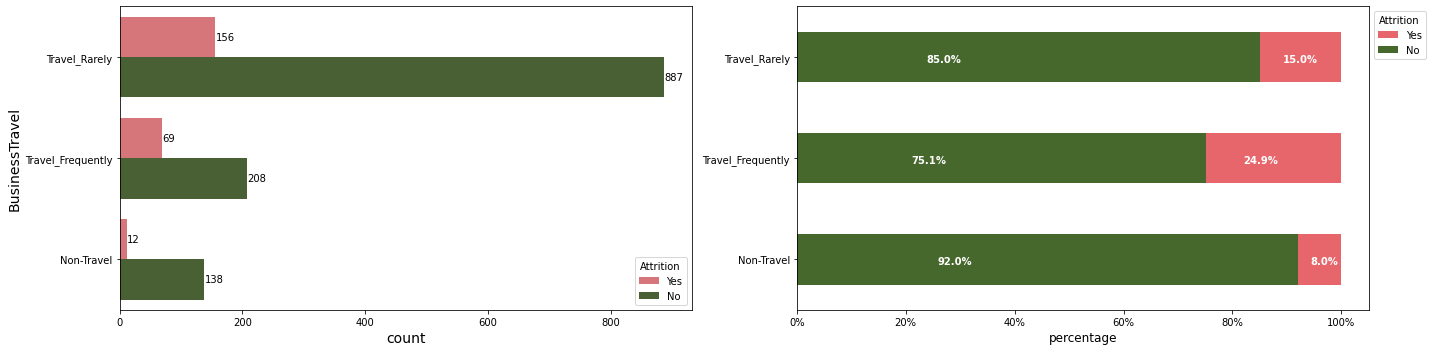

In [121]:
plot_cat_plots(data=data, x='BusinessTravel', target='Attrition', x_offset=0.28, y_offset=0.4)

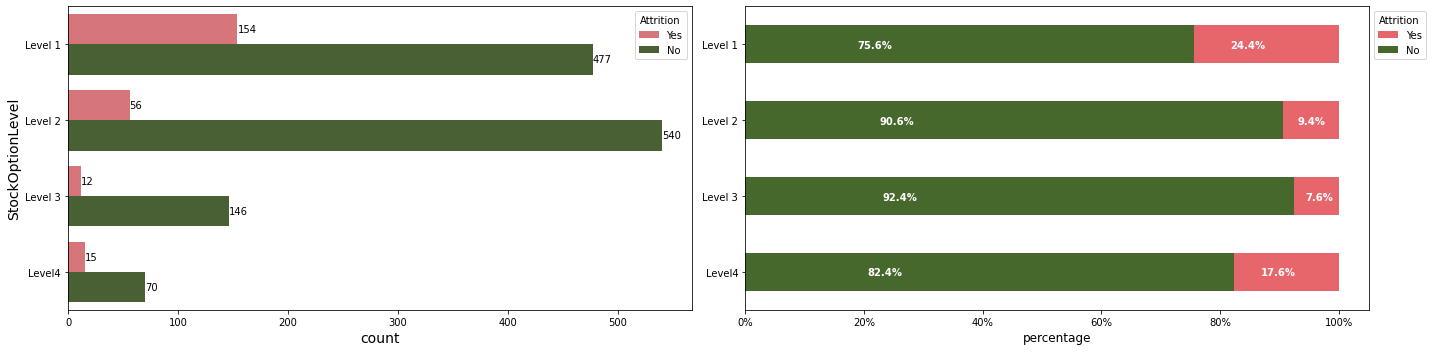

In [122]:
plot_cat_plots(data=data, x='StockOptionLevel', target='Attrition', x_offset=0.25)

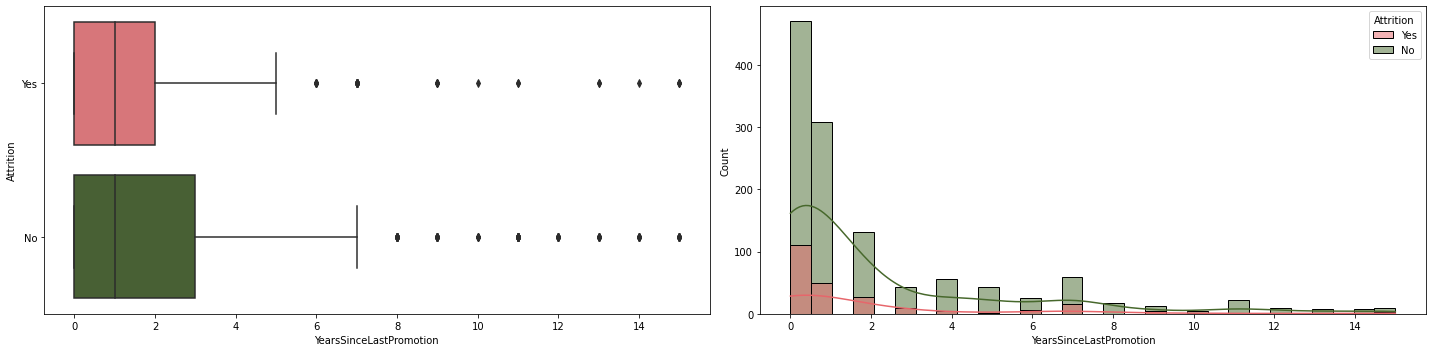

In [123]:
plot_numeric_plots(data=data, x='YearsSinceLastPromotion', target='Attrition')

### Summary

* Employees that travel frequently have the highest attrition rate (24.9%).
* Employees that have the lowest stock option level have the highest attrition rate (24.4%). Surprisingly, the second highest attrition rate is that of employees that have the highest stock option level (17.6%). 

## Tenure, and Attrition

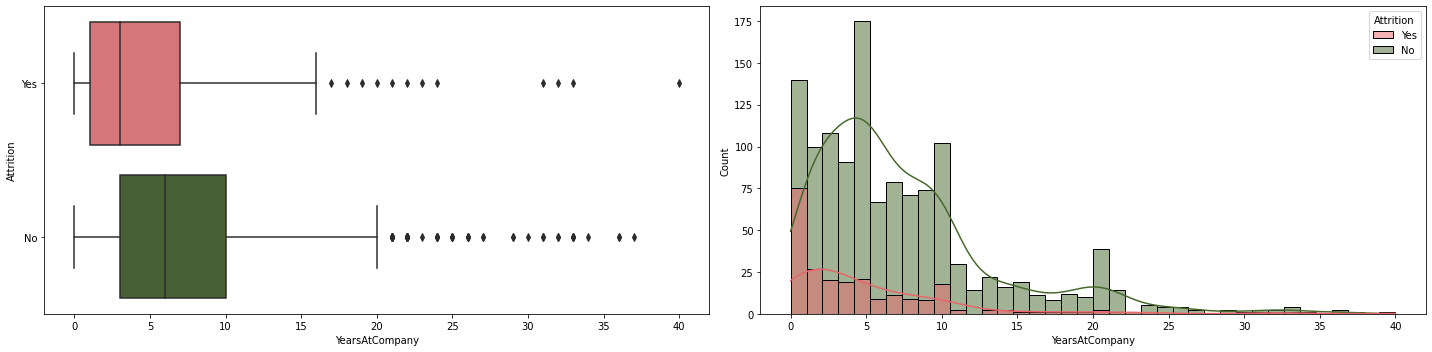

In [124]:
plot_numeric_plots(data=data, x='YearsAtCompany', target='Attrition')

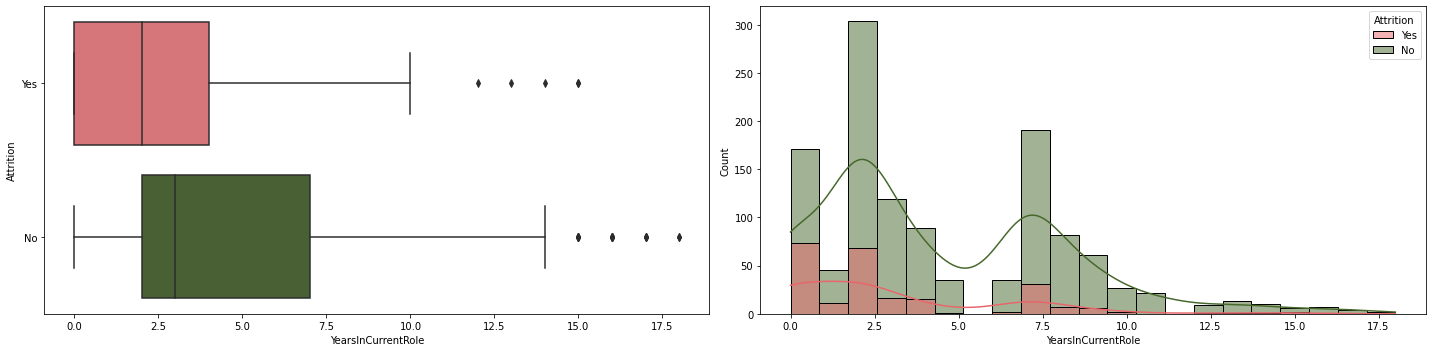

In [125]:
plot_numeric_plots(data=data, x='YearsInCurrentRole', target='Attrition')

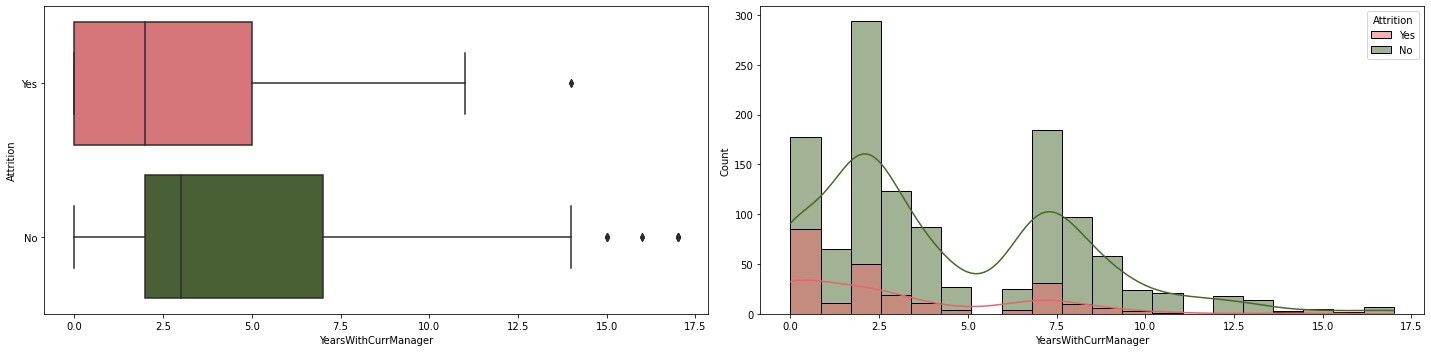

In [126]:
plot_numeric_plots(data=data, x='YearsWithCurrManager', target='Attrition')

### Summary

* Employees that left the company had overall lower median number of years spent in the company.

## Department, Role, and Attrition

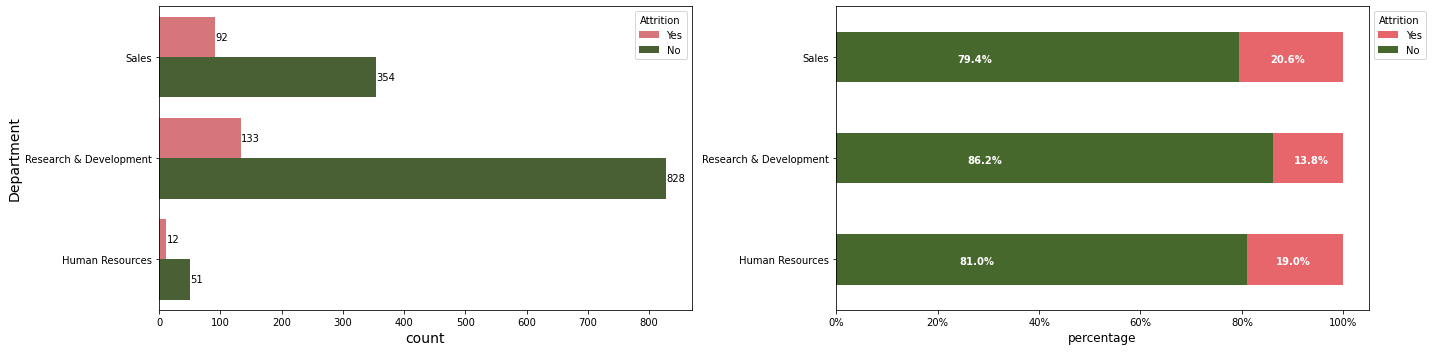

In [127]:
plot_cat_plots(data=data, x='Department', target='Attrition', y_offset=0.4)

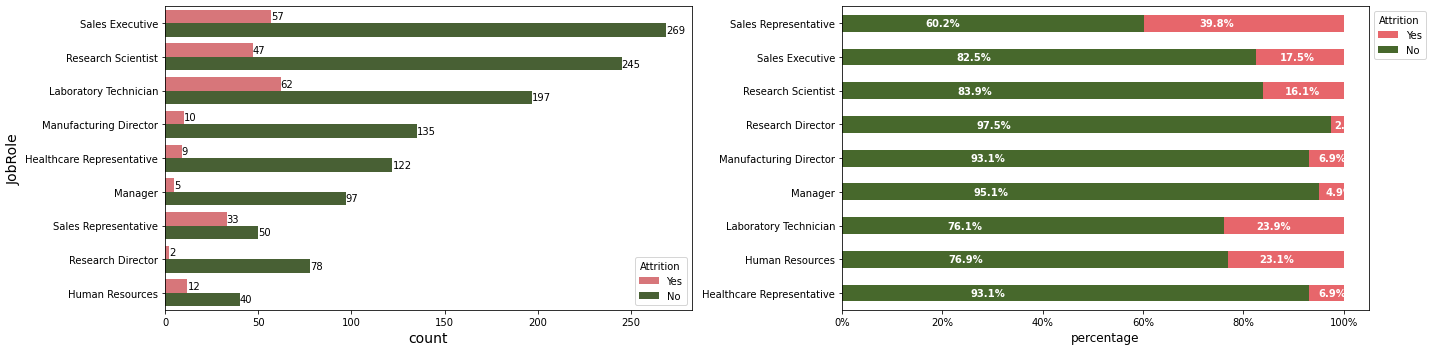

In [128]:
plot_cat_plots(data=data, x='JobRole', target='Attrition', x_offset=0.275, y_offset=0.3)

### Summary

* The sales department has the highest rate of attrition (20.6%) followed by the human resources department (19%).
* Among all roles in the company, sales representatives have the highest rate of attrition (39.8%) followed by laboratory technicians (23.9%) and human resources (23.1%).

## Work Experience History and Attrition

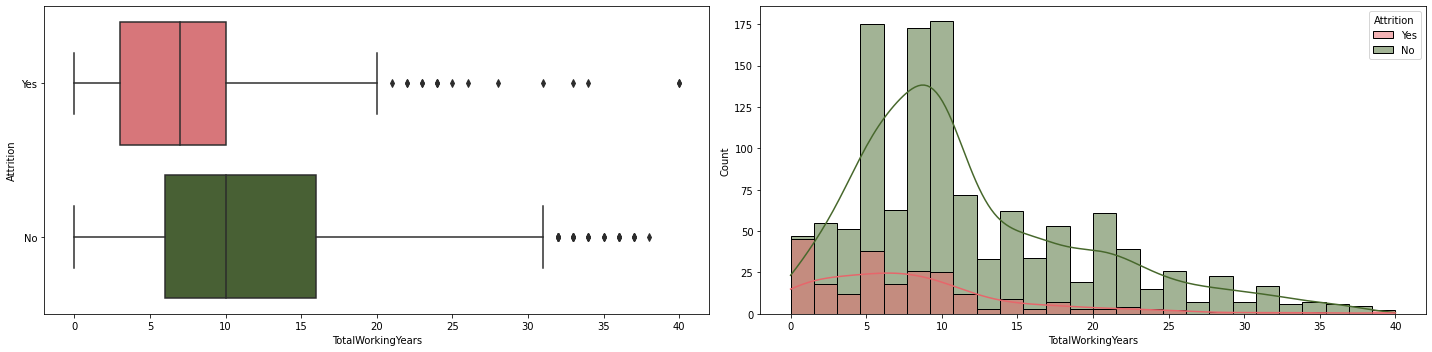

In [129]:
plot_numeric_plots(data=data, x='TotalWorkingYears', target='Attrition')

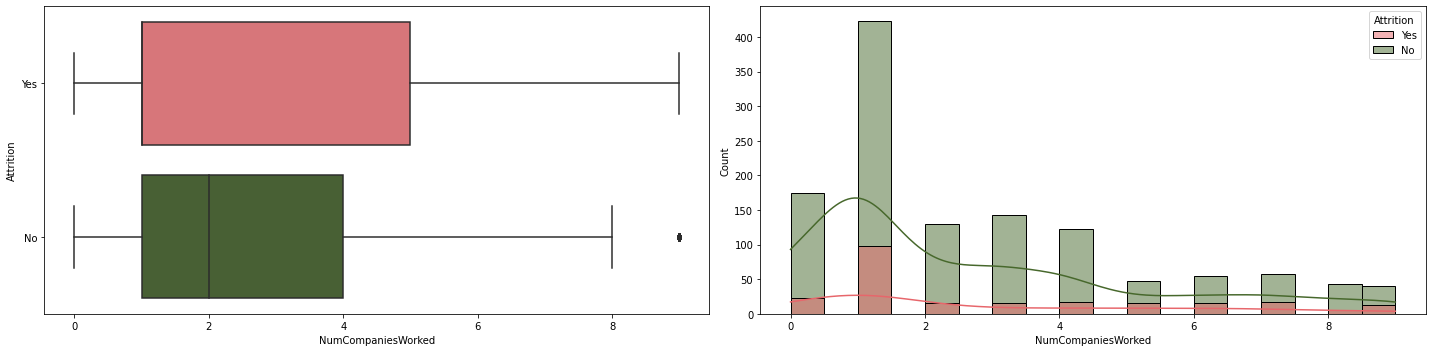

In [130]:
plot_numeric_plots(data=data, x='NumCompaniesWorked', target='Attrition')

## Other Variables and Attrition

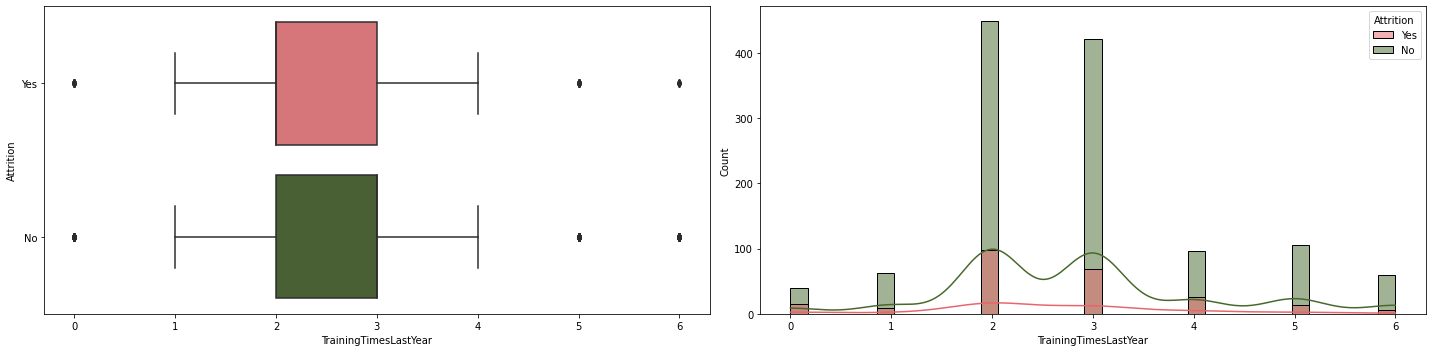

In [131]:
plot_numeric_plots(data=data, x='TrainingTimesLastYear', target='Attrition')

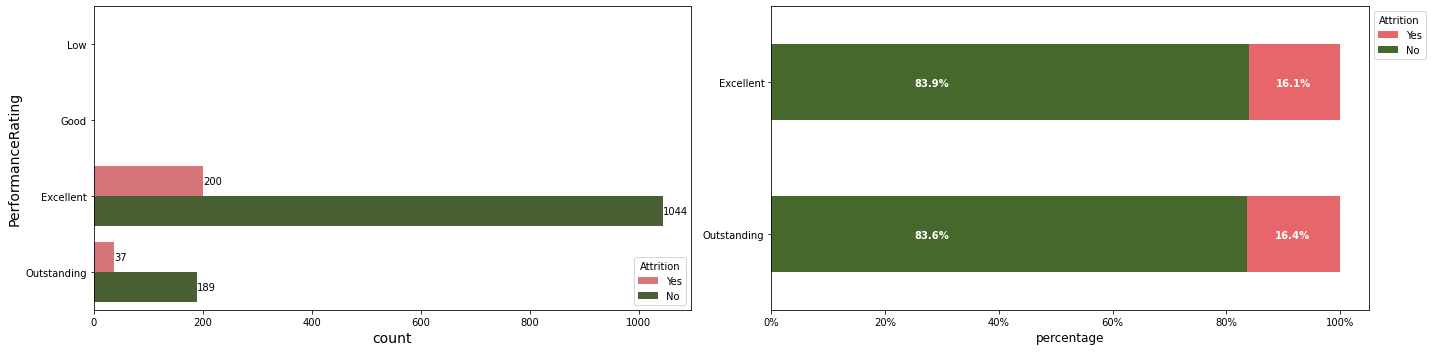

In [132]:
plot_cat_plots(data=data, x='PerformanceRating', target='Attrition', y_offset=0.55)

# Training a Logistic Regression Classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## Preprocessing

In [11]:
categ_cols = data.select_dtypes(include=['object', 'category']).columns
enc = OrdinalEncoder()
data[categ_cols] = enc.fit_transform(data[categ_cols])

In [12]:
features = data.drop('Attrition', axis=1).columns
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1.0,0.590048,0.742527,1.401512,-1.010909,0.195104,-0.937414,0.0,-1.701283,...,-0.398342,0.0,-0.932014,-0.421642,-2.171982,-2.712107,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0.0,-0.913194,-1.297775,-0.493817,-0.147150,-0.415114,-0.937414,0.0,-1.699621,...,1.255790,0.0,0.241988,-0.164511,0.155707,-0.028299,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.0,0.590048,1.414363,-0.493817,-0.887515,0.195104,1.316673,0.0,-1.696298,...,0.428724,0.0,-0.932014,-0.550208,0.155707,-0.028299,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0.0,-0.913194,1.461466,-0.493817,-0.764121,1.415540,-0.937414,0.0,-1.694636,...,-1.225408,0.0,-0.932014,-0.421642,0.155707,-0.028299,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.0,0.590048,-0.524295,-0.493817,-0.887515,-0.415114,0.565311,0.0,-1.691313,...,1.255790,0.0,0.241988,-0.678774,0.155707,-0.028299,-0.817734,-0.615492,-0.058285,-0.595227


## Running the Model

In [14]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

model = LogisticRegression(random_state=42)
model.fit(X, y)

LogisticRegression(random_state=42)

In [28]:
odds = np.exp(model.coef_[0]) # turn log odds to odds
attr_odds = pd.DataFrame(odds, X.columns, columns=['Odds Coefficient']).sort_values(by='Odds Coefficient', ascending=False)

## Results

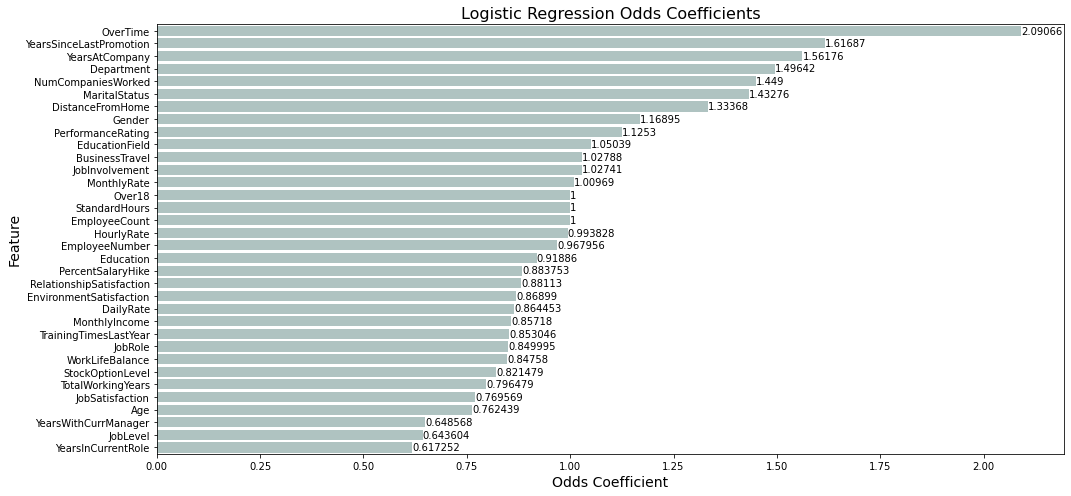

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
sns.barplot(y=attr_odds.index, x=attr_odds["Odds Coefficient"], ax=axs, color=pal[3])
for containter in axs.containers:
    axs.bar_label(containter)
axs.set_ylabel("Feature", fontsize=14)
axs.xaxis.label.set_fontsize(14)
axs.set_title("Logistic Regression Odds Coefficients", fontsize=16)

plt.tight_layout()
plt.show()

The top 3 strongest predictors of whether an employee will leave the company or not are the following:
1. OverTime: working overtime is associated with a 2 times increase in the odds ratio of attrition.
2. YearsSinceLastPromotion: a one unit increase in years since last promotion is associated with a 1.62 times increase in the odds ratio of attrition.
3. YearsAtCompany: a one unit increase in years at company is associated with a 1.56 times increase in the odds ratio of attrition.